In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [19]:
os.chdir("c:\\ml_using_python\\Data")

In [20]:
ipl_auction_df = pd.read_csv("IPL_IMB381IPL2013.csv")

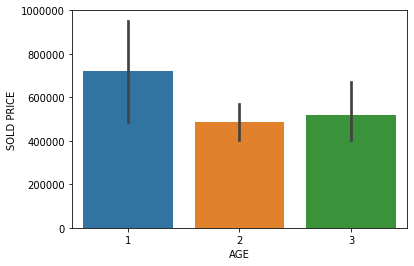

In [21]:
#Bar chart is used to get the frequnecy for qualitative (categorical) variables.
#it is used to understand the most or least occuring data

#let us get bar chart for AGE Category vs SOLD PRICE

sns.barplot(data = ipl_auction_df, x = 'AGE', y= "SOLD PRICE")



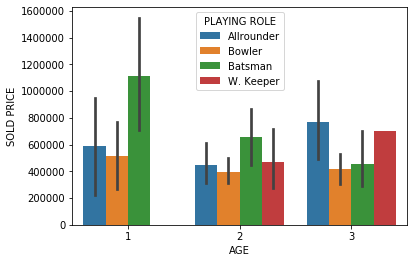

In [22]:
#Let us divide the above bar chart based on playing role

sns.barplot(data=ipl_auction_df, x='AGE', y="SOLD PRICE", hue="PLAYING ROLE")

(array([27., 32., 21., 20., 14.,  7.,  0.,  1.,  4.,  4.]),
 array([  20000.,  198000.,  376000.,  554000.,  732000.,  910000.,
        1088000., 1266000., 1444000., 1622000., 1800000.]),
 <a list of 10 Patch objects>)

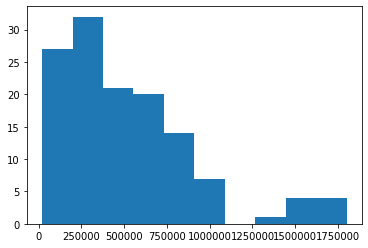

In [23]:
#Histogram, basically shows the frequency distribution of a conitnous variable. Histograms can be used to understand the 
#skewness in the distribution
plt.hist(ipl_auction_df['SOLD PRICE'])


(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <a list of 20 Patch objects>)

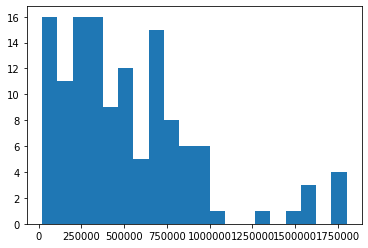

In [24]:
plt.hist(ipl_auction_df['SOLD PRICE'], bins=20)


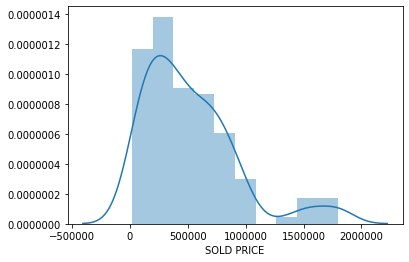

In [25]:
#density plot
sns.distplot(ipl_auction_df['SOLD PRICE'])

 A density plot is a plot of the local relative frequency or density of points along the number line or x-axis of a plot. 
 
 The local density is determined by summing the individual “kernel” densities for each point. Where points occur more frequently, this sum, and consequently the local density, will be greater. 
 
 Density plots get around some of the problems that histograms have, but still require some choices to be made. 
 
 Density plots gives insight inti what might be the distribution of the population
 
 
 

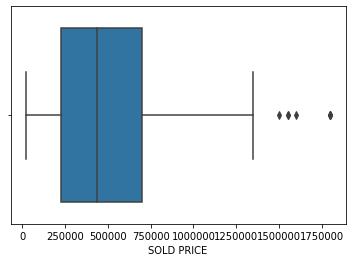

In [26]:
# Box plot / Whisker plot

#box plot shows 1.min value, 2. max value 3. median 4. 1st quartile 5. 3rd quartile

#IQR Inter Quartile Range
#IQR = Q3 - Q1

# Q1 - 1.5(IQR) points less than this are outliers
# Q3 + 1.5(IQR) points above than  this are outliers

sns.boxplot(ipl_auction_df['SOLD PRICE'])


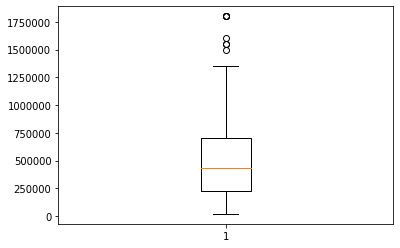

In [47]:
box = plt.boxplot(ipl_auction_df['SOLD PRICE'])

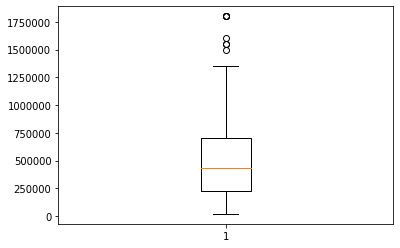

In [48]:
# get the values from box

box = plt.boxplot(ipl_auction_df['SOLD PRICE'])

In [49]:
items = box['caps']

In [50]:
y_min = items
print("Min price Offered",y_min[0].get_ydata()[0])
print("Max price Offered",y_min[1].get_ydata()[0])

Min price Offered 20000.0
Max price Offered 1350000.0


In [51]:
items = box['whiskers']

In [52]:
y_min = items
print("25th Percentile / 1st Quartile",y_min[0].get_ydata()[0])
print("75th Percentile / 3rd Quartile",y_min[1].get_ydata()[0])

25th Percentile / 1st Quartile 225000.0
75th Percentile / 3rd Quartile 700000.0


In [53]:
print("IQR = ", y_min[1].get_ydata()[0] - y_min[0].get_ydata()[0])

IQR =  475000.0


In [55]:
#get median
items = box['medians']

print("Median" , items[0].get_ydata()[0])

Median 437500.0


In [60]:
#find outliers, there are some points beyond the max price of 1350000.0

ipl_auction_df[ipl_auction_df['SOLD PRICE']>1350000.0][['PLAYER NAME','PLAYING ROLE','SOLD PRICE']]

,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


__Comparing Distributions__


In [61]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

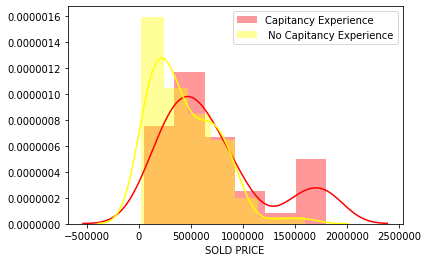

In [73]:
sns.distplot (ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==1]['SOLD PRICE'] , color='red' , label='Capitancy Experience' )
sns.distplot (ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']==0]['SOLD PRICE'] , color='yellow' , label=' No Capitancy Experience' )
plt.legend()

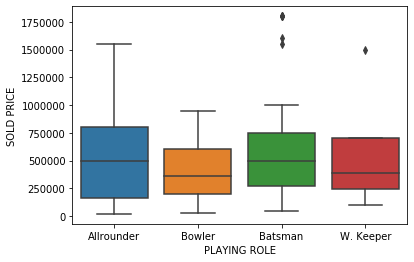

In [76]:

sns.boxplot(x='PLAYING ROLE', y='SOLD PRICE', data=ipl_auction_df)

In [77]:
ipl_batsman_df = ipl_auction_df[ipl_auction_df['PLAYING ROLE']=='Batsman']

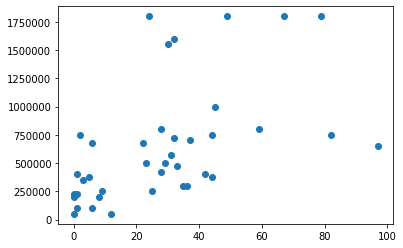

In [80]:
plt.scatter(x=ipl_batsman_df.SIXERS,y=ipl_batsman_df['SOLD PRICE'])

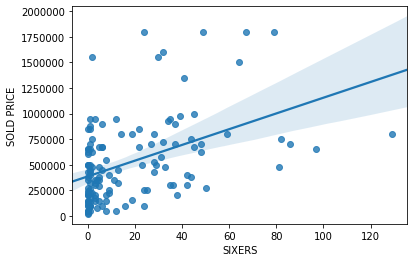

In [81]:
sns.regplot(x=ipl_auction_df.SIXERS, y = ipl_auction_df['SOLD PRICE'])

In [82]:
influnetial_features = ['SR-B','AVE','SIXERS','SOLD PRICE']

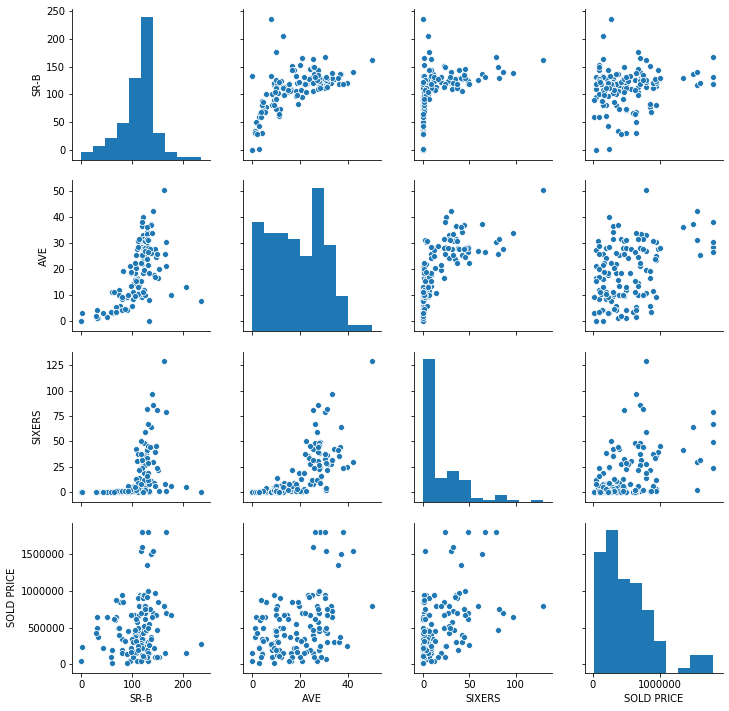

In [84]:
sns.pairplot(ipl_auction_df[influnetial_features])

In [90]:
cor_matrix = ipl_auction_df[influnetial_features].corr()

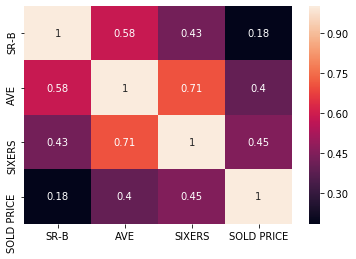

In [91]:
sns.heatmap(cor_matrix, annot=True)